### Хабибуллин Тимур, ДЗ 2

In [92]:
import numpy as np
import matplotlib.pyplot as plt


Зададим список первых 10 функций

In [93]:
func = [lambda x: 1/6*x**6 - 52/25*x**5 + 39/80*x**4+71/10*x**3-79/20*x**2-x+1/10,
       lambda x: np.sin(x)+np.sin(10/3*x),
       lambda x: -sum([k*np.sin((k+1)*x +k) for k in range(1, 6)]),
       lambda x: -(16*x**2-24*x+5)*np.exp(-x),
       lambda x: (3*x-1.4)*np.sin(18*x),
       lambda x: -(x+np.sin(x))*np.exp(-x**2),
       lambda x: np.sin(x)+np.sin(10/3*x)+np.log(x)-0.84*x+3,
       lambda x: -sum([k*np.cos((k+1)*x + k) for k in range(1, 6)]),
       lambda x: np.sin(x)+np.sin(2/3*x),
       lambda x: -x*np.sin(x)]
omega = [(-1.5, 11),
        (2.7, 7.5),
        (-10, 10),
        (1.9, 3.9),
        (0, 1.2),
        (-10, 10),
        (2.7, 7.5),
        (-10, 10),
        (3.1, 20.4),
        (0, 10)]

Теперь напишем функцию для подсчета глобальной оценки константы Либшица

In [94]:
def Lipschitz(q, r):
    h_cur = 0
    for i in range(1, len(q)):
        x1, z1 = q[i-1]
        x2, z2 = q[i]
        h = np.abs(z2 - z1)/(x2 - x1)
        h_cur = max(h_cur, h)
    if h_cur == 0:
        return 1
    return r * h_cur

Теперь напишем дополнительные методы для работы поиска минимума. Описания функций есть в самих функциях в комметариях

In [109]:
def find_new_y(q, L):
    """
    Считает характеристику отрезков (-y_i)
    """
    y_gap = []
    for i in range(1, len(q)):
        x1, z1 = q[i-1]
        x2, z2 = q[i]
        y_gap.append(-((z2 + z1)/2 - L *(x2-x1)/2))
    return y_gap

def find_new_R(q, L):
    """
    Считаем характеристику отрезков R_i
    """
    R = []
    for i in range(1, len(q)):
        x1, z1 = q[i-1]
        x2, z2 = q[i]
        R.append(L*(x2-x1) + (z2-z1)**2 / (L*(x2-x1)) - 2*(z1+z2))
    return R

def count_add_nodes(q, L):
    """
    Функция для подсчета узлов ломанной, которые не на кривой
    """
    nodes = []
    for i in range(1, len(q)):
        x1, z1 = q[i-1]
        x2, z2 = q[i]
        L1 = L
        if mode == 'Inform_Geom':
            L1 = (L + 1/L*((z2-z1)/(x2-x1))**2) / 2
        nodes.append(((x2+x1)/2 - (z2-z1)/(2*L1), (z2 + z1)/2 - L1 *(x2-x1)/2))
    return nodes

def merge(x, z, q):
    res = []
    for i in range(len(q)):
        if q[i][0] < x:
            res.append(q[i])
        else:
            res.append((x, z))
            res.extend(q[i:])
            return res


Теперь напишем функцию для поиска минимума. Описание режимов - в комментариях функции. Будет принимать функцию и отрезок их соответствующих списков

In [110]:
def search_min(f, a, b, r=2, N =1000, mode='Geom_GLobal', L=20):
    """
    Broken_line - метод ломанной
    Geom_GLobal - глобально геометрический алгоритм
    Inform_Stat - информационно-статистический
    Inform_Geom - информационно-статистический с L с волной
        (меняется пересчет точки для следующего испытания по геометрическому принципу)
    """
    eps = (b-a) * 1e-4
    q = [(a, f(a)), (b, f(b))]    # точки на кривой
    k = 1
    for i in range(N):
        if mode != 'Broken_line':
            L = Lipschitz(q, r)
        if mode in ['Broken_line', 'Geom_GLobal']:
            arr = find_new_y(q, L)
        else:
            arr = find_new_R(q, L)
        t = np.argmax(np.array(arr)) + 1
        if q[t][0] - q[t-1][0] < eps:
            break
        x1, z1 = q[t-1]
        x2, z2 = q[t]
        if mode == 'Inform_Geom':
            L = (L + 1/L*((z2-z1)/(x2-x1))**2) / 2
        x = (x2+x1)/2 - (z2-z1)/(2*L)
        z = f(x)
        q = merge(x, z, q)
        k += 1
    add_nodes = count_add_nodes(q, L)
    return q, add_nodes, k

Теперь нарисуем графики в случае геометрического и информационно-статистических методов. Метод ломанной потом нарисуем

Функция№ 1
Настоящий минимум: 10.00000000000001, -29763.23333333336 

   ~ Geom_GLobal ~
Количество шагов: 226
Найденный минимум: 9.99962210975876, -29763.23266201622
   ~ Inform_Stat ~
Количество шагов: 126
Найденный минимум: 10.000166516485933, -29763.233202964097
   ~ Inform_Geom ~
Количество шагов: 138
Найденный минимум: 10.000171860411054, -29763.233194461864


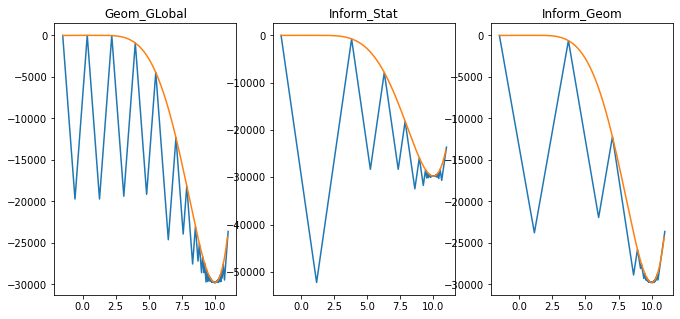

Функция№ 2
Настоящий минимум: 5.1499999999999915, -1.8994908045690733 

   ~ Geom_GLobal ~
Количество шагов: 190
Найденный минимум: 5.145580122994735, -1.899599205534227
   ~ Inform_Stat ~
Количество шагов: 134
Найденный минимум: 5.145765122906243, -1.8995993438432501
   ~ Inform_Geom ~
Количество шагов: 141
Найденный минимум: 5.14564762318745, -1.8995993033078715


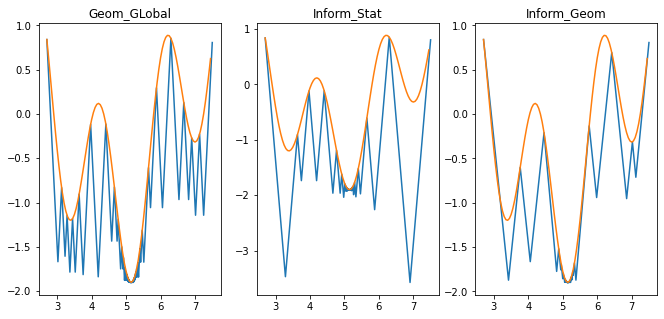

Функция№ 3
Настоящий минимум: 5.8000000000002245, -12.020848475826089 

   ~ Geom_GLobal ~
Количество шагов: 370
Найденный минимум: 5.791705183699159, -12.031248206784934
   ~ Inform_Stat ~
Количество шагов: 223
Найденный минимум: -6.774400191723434, -12.0312446451809
   ~ Inform_Geom ~
Количество шагов: 188
Найденный минимум: -6.774598595477262, -12.031249364054037


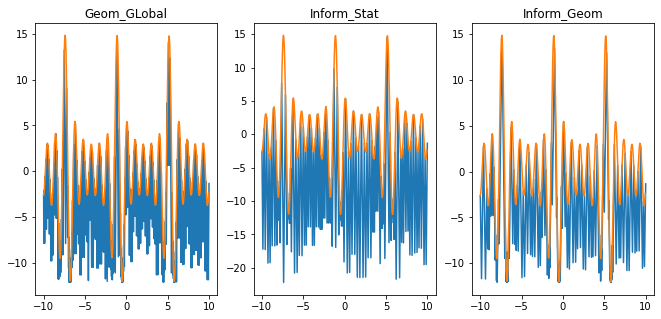

Функция№ 4
Настоящий минимум: 2.8500000000000005, -3.850117997429248 

   ~ Geom_GLobal ~
Количество шагов: 590
Найденный минимум: 2.868040395358104, -3.8504507087585074
   ~ Inform_Stat ~
Количество шагов: 378
Найденный минимум: 2.868013805867744, -3.850450708386246
   ~ Inform_Geom ~
Количество шагов: 298
Найденный минимум: 2.868121447202855, -3.850450701027137


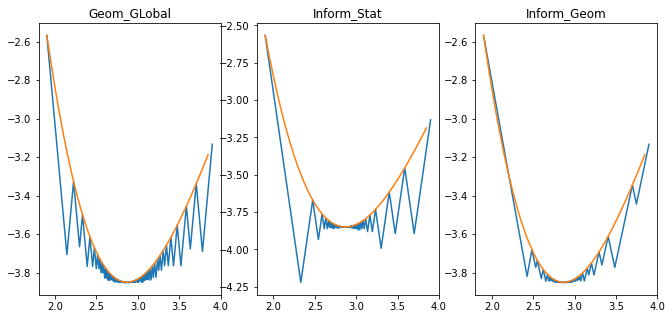

Функция№ 5
Настоящий минимум: 0.9500000000000001, -1.4268942573683832 

   ~ Geom_GLobal ~
Количество шагов: 197
Найденный минимум: 0.9660756056178285, -1.4890725129802986
   ~ Inform_Stat ~
Количество шагов: 125
Найденный минимум: 0.9660477510021295, -1.4890721807575813
   ~ Inform_Geom ~
Количество шагов: 114
Найденный минимум: 0.9660902472412133, -1.4890725338088782


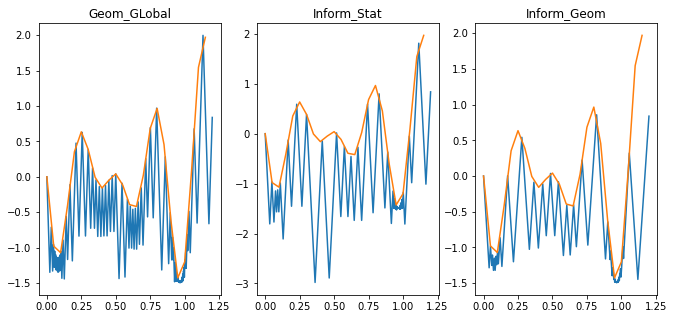

Функция№ 6
Настоящий минимум: 0.7000000000001521, -0.8235032347313309 

   ~ Geom_GLobal ~
Количество шагов: 180
Найденный минимум: 0.6796331482833821, -0.8242393931808824
   ~ Inform_Stat ~
Количество шагов: 94
Найденный минимум: 0.6790843260311595, -0.8242389625286974
   ~ Inform_Geom ~
Количество шагов: 91
Найденный минимум: 0.6802975767883898, -0.8242384769850502


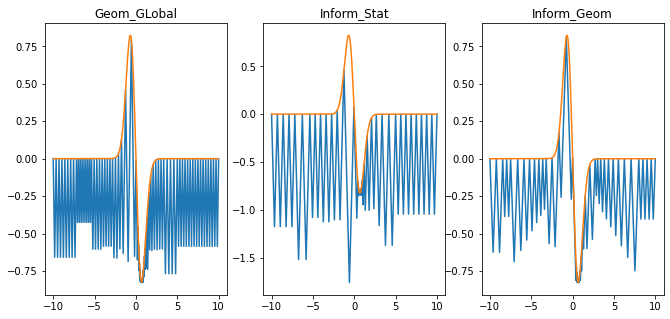

Функция№ 7
Настоящий минимум: 5.199999999999991, -1.6013072532171346 

   ~ Geom_GLobal ~
Количество шагов: 206
Найденный минимум: 5.199806735850519, -1.6013075416905345
   ~ Inform_Stat ~
Количество шагов: 114
Найденный минимум: 5.199716467686218, -1.601307523614051
   ~ Inform_Geom ~
Количество шагов: 127
Найденный минимум: 5.199826845353826, -1.601307532464527


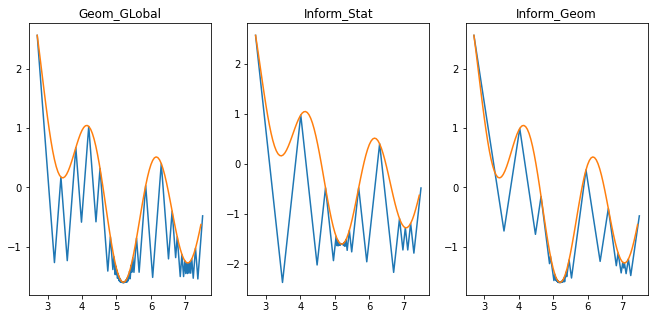

Функция№ 8
Настоящий минимум: -0.7999999999998693, -14.507990225645369 

   ~ Geom_GLobal ~
Количество шагов: 298
Найденный минимум: -0.8001560857376591, -14.508003252162379
   ~ Inform_Stat ~
Количество шагов: 187
Найденный минимум: 5.482809616855581, -14.508007415540607
   ~ Inform_Geom ~
Количество шагов: 176
Найденный минимум: 5.482714409728427, -14.508004074497427


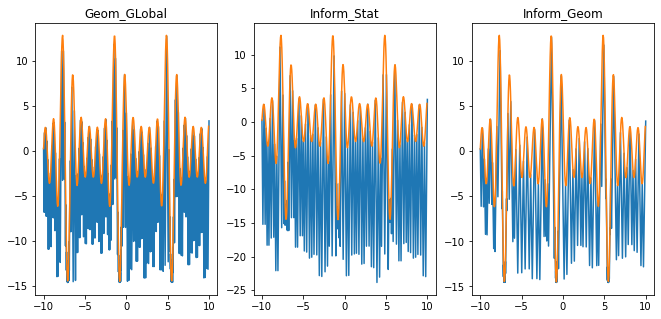

Функция№ 9
Настоящий минимум: 17.04999999999995, -1.9058801986815839 

   ~ Geom_GLobal ~
Количество шагов: 208
Найденный минимум: 17.03916259927233, -1.9059611177996763
   ~ Inform_Stat ~
Количество шагов: 124
Найденный минимум: 17.039475467595075, -1.9059610656962755
   ~ Inform_Geom ~
Количество шагов: 124
Найденный минимум: 17.03858639462332, -1.905960858545496


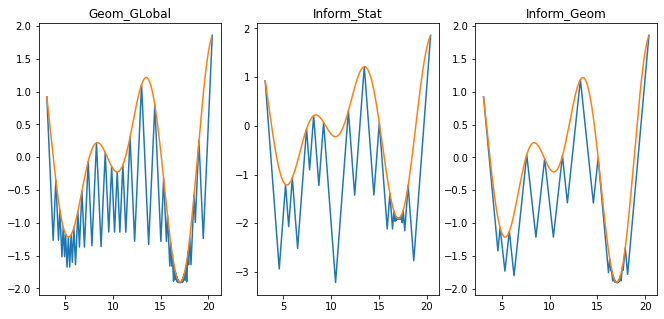

Функция№ 10
Настоящий минимум: 8.0, -7.914865972987054 

   ~ Geom_GLobal ~
Количество шагов: 241
Найденный минимум: 7.97870805032676, -7.916727364269477
   ~ Inform_Stat ~
Количество шагов: 156
Найденный минимум: 7.979027740675282, -7.916726836471943
   ~ Inform_Geom ~
Количество шагов: 143
Найденный минимум: 2.0287869864165327, -1.8197057400109768


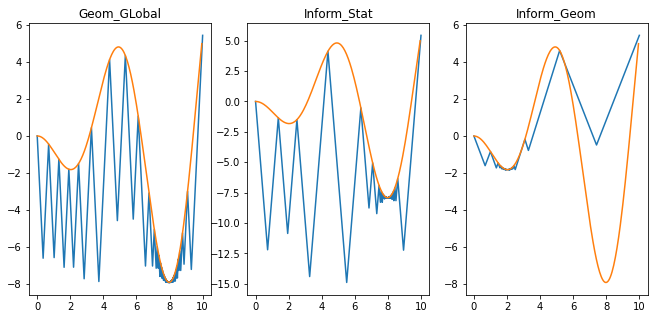

In [111]:
modes = ['Geom_GLobal', 'Inform_Stat', 'Inform_Geom']
interations = np.zeros((len(func), 3))
for i in range(len(func)):
    plt.figure(figsize=(15, 5))
    x = np.arange(*omega[i], 0.05)
    y = func[i](x)
    x_real, y_real = x[np.argmin(y)], min(y)
    print('Функция№', i+1)
    print(f'Настоящий минимум: {x_real}, {y_real}', '\n')
    for j, mode in enumerate(modes):
        plt.subplot(1, 4, j+1)
        q, add_nodes, k = search_min(func[i], *omega[i], mode=mode)
        new_q = q + add_nodes    # нужно для построения ломанной
        new_q.sort(key=lambda x: x[0])
        new_q = np.array(new_q)
        q = np.array(q)
        plt.plot(new_q[:, 0], new_q[:, 1])
        plt.plot(x, y)
        plt.title(mode)
        x_min, y_min = min(q, key=lambda x: x[1])    # минимумы надо брать из узлов на кривой
        print('   ~', mode,'~')
        print(f'Количество шагов: {k}')
        print(f'Найденный минимум: {x_min}, {y_min}')
        interations[i,j] = k
    plt.show()


Можно посмотреть на количество итераций в табличке. Очередность столбцов соответствует очередности методов на графиках. Если сравнить с таблицей в методичке, то получается что значения оч близки

In [98]:
interations.astype('int')

array([[226, 126, 138],
       [190, 134, 141],
       [370, 223, 188],
       [590, 378, 298],
       [197, 125, 114],
       [180,  94,  91],
       [206, 114, 127],
       [298, 187, 176],
       [208, 124, 124],
       [241, 156, 143]])

Видно что у информационного алгоритма чисто итераций всегда меньше. Кроме того, модификация информационного алгоритма с помощью $\tilde L$ часто дает уменьшение количества итераций. Сами алгоритмы удобные, потому что не надо считать $L$ самому.

Теперь воспользуемся нашей функцией и построим график для тройки первых функций. На самом деле метод ломанных и правда очень неудобен из-за того, что надо руками подбирать $L$. Например, у меня чуть не сломался компьютер из-за того, что я для первой функции поставил слишком маленькое $L$. Тут оказывается надо $L=20000$. Для второй функции надо сильно меньше.

Функция№ 1
Настоящий минимум: 10.00000000000001, -29763.23333333336 

   ~ Broken_line ~
Количество шагов: 216
Найденный минимум: 10.000394419439383, -29763.232601850206


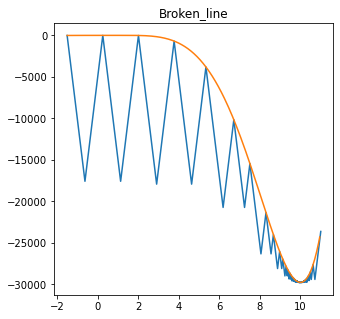

Функция№ 2
Настоящий минимум: 5.1499999999999915, -1.8994908045690733 

   ~ Broken_line ~
Количество шагов: 236
Найденный минимум: 5.145658131898026, -1.8995993136398526


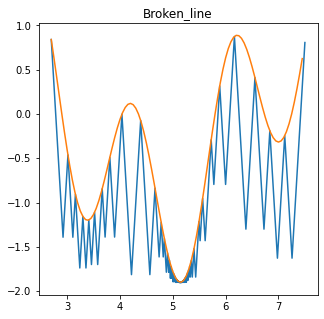

Функция№ 3
Настоящий минимум: 5.8000000000002245, -12.020848475826089 

   ~ Broken_line ~
Количество шагов: 308
Найденный минимум: 5.791936403020286, -12.031246320777246


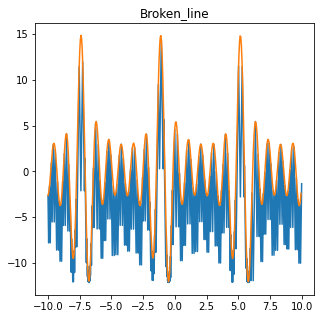

In [99]:
L = [20000, 10, 100]
for i in range(3):
    plt.figure(figsize=(5, 5))
    x = np.arange(*omega[i], 0.05)
    y = func[i](x)
    x_real, y_real = x[np.argmin(y)], min(y)
    print('Функция№', i+1)
    print(f'Настоящий минимум: {x_real}, {y_real}', '\n')
    mode = 'Broken_line'
    q, add_nodes, k = search_min(func[i], *omega[i], mode=mode, L=L[i])
    new_q = q + add_nodes    # нужно для построения ломанной
    new_q.sort(key=lambda x: x[0])
    new_q = np.array(new_q)
    q = np.array(q)
    plt.plot(new_q[:, 0], new_q[:, 1])
    plt.plot(x, y)
    plt.title(mode)
    x_min, y_min = min(q, key=lambda x: x[1])    # минимумы надо брать из узлов на кривой
    print('   ~', mode,'~')
    print(f'Количество шагов: {k}')
    print(f'Найденный минимум: {x_min}, {y_min}')
    plt.show()